In [20]:
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report

import eli5

In [105]:
df = pd.read_csv('../Tech Stack/models/gpt2/data.csv')

In [106]:
df.head(10)

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\alfiy\anaconda3\envs\finbert\lib\site-packages\pandas\io\common.py)

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
5    $SPY wouldn't be surprised to see a green close  positive
6  Shell's $70 Billion BG Deal Meets Shareholder ...  negative
7  SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...  negative
8  Kone 's net sales rose by some 14 % year-on-ye...  positive
9  The Stockmann department store will have a tot...   neutral

In [23]:
df.shape

(5842, 2)

In [24]:

import matplotlib.pyplot as plt

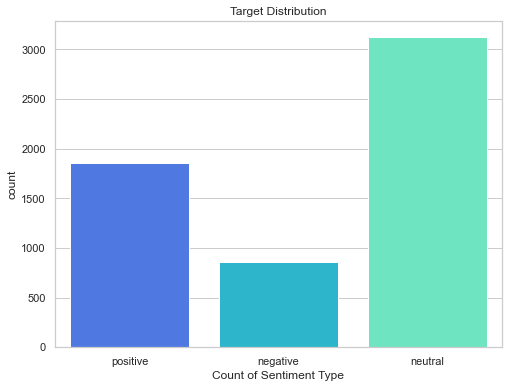

<Figure size 432x288 with 0 Axes>

In [25]:
sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')
plt.figure(figsize=(8,6))
sns.countplot(x=df['Sentiment'])
plt.xlabel('Count of Sentiment Type')
plt.title('Target Distribution')
plt.show()
plt.savefig('Target Distribution')

In [28]:
import textstat

df['Sentence Length'] = df['Sentence'].apply(lambda x : textstat.lexicon_count(x, removepunct=True))

df_positive = df.loc[df['Sentiment'] == 'positive']
df_negative = df.loc[df['Sentiment'] == 'negative']
df_neutral = df.loc[df['Sentiment'] == 'neutral']


fig = make_subplots(rows=1, cols=3)

fig.append_trace(
    go.Box(name='Positive', y=df_positive['Sentence Length']),
    row=1, col=1
)

fig.append_trace(
    go.Box(name='Negative', y=df_negative['Sentence Length']),
    row=1, col=2
)

fig.append_trace(
    go.Box(name='Neutral', y=df_neutral['Sentence Length']),
    row=1, col=3
)

fig.update_layout(height=500, width=700, title_text="Distribution of Sentence Length across classes")
fig.show()

In [30]:
from rake_nltk import Rake
r = Rake()
negative_corpus = df_negative['Sentence'].tolist()
negative_corpus = " ".join(negative_corpus)
r.extract_keywords_from_text(negative_corpus)
top_phrases_neg = r.get_ranked_phrases()[0:100]


positive_corpus = df_positive['Sentence'].tolist()
positive_corpus = " ".join(positive_corpus)
r.extract_keywords_from_text(positive_corpus)
top_phrases_pos = r.get_ranked_phrases()[0:100]


neutral_corpus = df_neutral['Sentence'].tolist()
neutral_corpus = " ".join(neutral_corpus)
r.extract_keywords_from_text(neutral_corpus)
top_phrases_neutral = r.get_ranked_phrases()[0:100]

pd.DataFrame({'Top Negative Phrases':top_phrases_neg,'Top Positive Phrases':top_phrases_pos,'Top Neutral Phrases':top_phrases_neutral})


ModuleNotFoundError: No module named 'rake_nltk'

In [31]:
import spacy
nlp = spacy.load('en_core_web_lg')
def ner_counter(doc):
    gpe_count = 0
    org_count = 0
    person_count = 0
    money_count=0
    for tok in doc.ents:
        if tok.label_ == "GPE":
            gpe_count = gpe_count + 1
        elif tok.label_ == "ORG":
            org_count=org_count+1
        elif tok.label_ == "PERSON":
            person_count=person_count+1
        elif tok.label_ == "MONEY":
            money_count=money_count+1
    return (gpe_count,org_count,person_count,money_count)

sentences = df['Sentence'].tolist()
sentences = " ".join(sentences)
sentences = nlp(sentences)
entity_counts = list(ner_counter(sentences))
entity_df = {'Entity Type':['GPE', 'ORG', 'PERSON', 'MONEY'],
        'Count':entity_counts}
fig = px.bar(entity_df,x='Entity Type',y='Count',color='Entity Type',text_auto=True)
fig.update_layout(height=500,width=500)


OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [32]:
import en_core_web_lg

ModuleNotFoundError: No module named 'en_core_web_lg'

In [ ]:
# import stylecloud
from IPython.display import Image
sentences = df['Sentence'].tolist()
corpus = " ".join(sentences)
stylecloud.gen_stylecloud(corpus,
                          icon_name = 'fas fa-globe',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='white',gradient='vertical',stopwords=True
                          )


Image(filename='stylecloud.png') 

In [175]:
df_neutral = df[(df['Sentiment']=='neutral')] 
df_negative = df[(df['Sentiment']=='negative')]
df_positive = df[(df['Sentiment']=='positive')]


# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 2000, 
                                 random_state=42)  

df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 2000, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
df_upsampled = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])

In [176]:
df_upsampled.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [177]:
dataColumn = df_upsampled.columns[0]
labelColumn = df_upsampled.columns[1]

In [178]:
labelColumn

'Sentiment'

In [179]:
df_upsampled[0:5]

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\alfiy\anaconda3\envs\finbert\lib\site-packages\pandas\io\common.py)

                                               Sentence Sentiment
742   The currency effect had a 3.0 pct , or 20 mln ...  negative
3015  $MFLX up  pre mkt. Looks like GAP has been fil...  negative
1898  However , the growth margin slowed down due to...  negative
777   It's a bad idea to make 5 min predictions base...  negative
472   Key price to watch in $NFLX, off the previous ...  negative

In [166]:
import numpy as np 
# import pandas as pd
import re
import string
from tqdm.notebook import tqdm
import plotly.express as px
import plotly.graph_objects as go

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW, 
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)

In [180]:
dataset_copy = df_upsampled.copy()

dataset = dataset_copy.sample(frac=0.80, random_state=0)
val_dataset = dataset_copy.drop(dataset.index)

In [181]:
max_len = None # Max lenght of the text for input
batch_size = 32
epochs = 6
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
num_classes = 3

In [182]:
# Dataset creator for Pytorch
class DatasetCreator(Dataset):
    def __init__(self, processed_data, train):
        self.data = processed_data
        self.train = train
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        line = self.data.iloc[index]
#         print(line)
        return {'text': line[dataColumn], 'label': line[labelColumn]}
#         if self.train:
#             return {'text': line[dataColumn], 'label': line[labelColumn]}
#         else:
#             return {'text': line[dataColumn], 'label': 0}

In [183]:
# Class to tokenize and process the text for input to the dataloader    
class GPT2_collator(object):
    def __init__(self, tokenizer, max_seq_len=None):
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        return
    
    def __call__(self, sequences):
        texts = [sequence['text'] for sequence in sequences]
        labels = [int(sequence['label']) for sequence in sequences]
        inputs = self.tokenizer(text=texts,
                                return_tensors='pt',
                                padding=True,
                                truncation=True,
                                max_length=self.max_seq_len)
        inputs.update({'labels': torch.tensor(labels)}) 
        print("-------labels torch tensor ---")
        print(torch.tensor(labels))
        return inputs

In [184]:
labelDict = {'negative': 0, 'neutral': 1, 'positive': 2 }

In [185]:
# Function to remove hashtags....etc. Intended to improve performance   
def pre_process(dataset):
    # Lowercase
    dataset[dataColumn] = dataset[dataColumn].apply(lambda x: x.lower())
    # Convert labels to numbers
    labelDict = {'negative': 0, 'neutral': 1, 'positive': 2 }
    dataset[labelColumn] = dataset[labelColumn].apply(lambda x: labelDict[x])
    # Remove hashtag
    # dataset[dataColumn] = dataset['text'].apply(lambda x: x.replace('#', ' ')) 
    # Remove websites
    #dataset[dataColumn] = dataset[dataColumn].apply(lambda x: re.sub(r"http\S+", " ", x))
    # Remove emails
    #dataset[dataColumn] = dataset[dataColumn].apply(lambda x: re.sub(r"\S*@\S*\s?", " ", x))
    # Remove punctuation
    dataset[dataColumn] = dataset[dataColumn].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))
    # Remove 'RT'
    #dataset[dataColumn] = dataset[dataColumn].apply(lambda x: re.sub(r"RT\s+", " ", x)) 
    print(dataset[0:4])
    return dataset


In [186]:
# Function for training
def train(dataloader, optimizer, scheduler, device):
    global model
    model.train()
    predictions_labels = []
    true_labels = []
    total_loss = 0
    
    for batch in tqdm(dataloader, total=len(dataloader)):
        true_labels += batch['labels'].numpy().flatten().tolist()
        batch = {k:v.type(torch.long).to(device) for k,v in batch.items()}
        optimizer.zero_grad()
        outputs = model(**batch)
        loss, logits = outputs[:2]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        predictions_labels += logits.argmax(axis=-1).flatten().tolist()
    avg_epoch_loss = total_loss / len(dataloader)
    return predictions_labels, true_labels, avg_epoch_loss

In [187]:
# Function for validation 
def validate(dataloader, device):
    global model
    model.eval()
    predictions_labels = []
    true_labels = []
    total_loss = 0
    
    for batch in tqdm(dataloader, total=len(dataloader)):
        true_labels += batch['labels'].numpy().flatten().tolist()
        batch = {k:v.type(torch.long).to(device) for k,v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
            loss, logits = outputs[:2]
            total_loss += loss.item()
            predictions_labels += logits.argmax(axis=-1).flatten().tolist()
    avg_epoch_loss = total_loss / len(dataloader)
    return predictions_labels, true_labels, avg_epoch_loss

In [188]:
def predict(dataloader, device):
    global model
    model.eval()
    predictions_labels = []
    
    for batch in tqdm(dataloader, total=len(dataloader)):
        batch = {k:v.type(torch.long).to(device) for k,v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
            _, logits = outputs[:2]
            predictions_labels += logits.argmax(axis=-1).flatten().tolist()
    return predictions_labels   

In [189]:
print('Loading gpt-2 model')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path='../Tech Stack/models/gpt2', num_labels=num_classes)

print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path='../Tech Stack/models/gpt2')
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path='../Tech Stack/models/gpt2', config=model_config)
model.resize_token_embeddings(len(tokenizer)) 
model.config.pad_token_id = model.config.eos_token_id
model.to(device)

Loading gpt-2 model
Loading tokenizer...
Loading model...


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at ../Tech Stack/models/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
      

In [190]:
gpt2_collator = GPT2_collator(tokenizer=tokenizer, max_seq_len=max_len)

# Prepare training data
processed_data = pre_process(dataset)
train_data = DatasetCreator(processed_data, train=True)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=gpt2_collator)

# Prepare validation data
val_processed = pre_process(val_dataset)
val_data = DatasetCreator(val_processed, train=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True, collate_fn=gpt2_collator)

                                               Sentence  Sentiment
4860  3 star analyst joe wittine from longbow resear...          2
4857  cash flow from operations in january december ...          1
44    a portion     12 5 million   will be recorded ...          2
3065  operating profit   excluding non recurring ite...          1
                                               Sentence  Sentiment
1220      bhp billiton posts big loss  slashes dividend          0
1442   yelp wayyy overvalued right now imo  should b...          0
948   the announcement pushed freenet shares down 6 ...          0
2624    vivus  vvus bear raid in effect  stock down 12           0


C:\Users\alfiy\anaconda3\envs\finbert\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\alfiy\anaconda3\envs\finbert\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\alfiy\anaconda3\envs\finbert\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [191]:
optimizer = AdamW(model.parameters(), lr = 5e-5, eps = 1e-8, weight_decay=0.01)
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)
loss = []
accuracy = []
val_loss_list = []
val_accuracy_list = []

for epoch in tqdm(range(epochs)):
    train_labels, true_labels, train_loss = train(train_dataloader, optimizer, scheduler, device)    
    train_acc = accuracy_score(true_labels, train_labels) 
    print('epoch: %.2f train accuracy %.2f' % (epoch, train_acc))
    loss.append(train_loss)
    accuracy.append(train_acc)

    val_labels, val_true_labels, val_loss = validate(val_dataloader, device)
    val_acc= accuracy_score(val_true_labels, val_labels)
    print('epoch: %.2f validation accuracy %.2f' % (epoch, val_acc))
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_acc)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


-------labels torch tensor ---
tensor([2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1,
        0, 0, 1, 2, 1, 2, 1, 0])
-------labels torch tensor ---
tensor([0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0,
        1, 0, 1, 1, 1, 1, 0, 2])
-------labels torch tensor ---
tensor([2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1,
        2, 2, 2, 1, 2, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1,
        2, 0, 2, 1, 0, 2, 1, 0])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0,
        1, 2, 0, 1, 1, 0, 2, 0])
-------labels torch tensor ---
tensor([2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1,
        1, 1, 1, 1, 0, 0, 1, 2])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1,
        1, 0, 2, 0, 1, 2,

-------labels torch tensor ---
tensor([2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0,
        1, 2, 1, 2, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1,
        2, 0, 0, 1, 1, 1, 1, 0])
-------labels torch tensor ---
tensor([1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2,
        1, 0, 2, 2, 2, 2, 1, 2])
-------labels torch tensor ---
tensor([1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2,
        0, 0, 2, 0, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2,
        1, 1, 2, 0, 1, 0, 1, 1])
-------labels torch tensor ---
tensor([0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2,
        1, 2, 2, 0, 1, 1, 1, 0])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1,
        2, 0, 2, 0, 2, 1,

-------labels torch tensor ---
tensor([2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 2, 1, 0, 0])
-------labels torch tensor ---
tensor([1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 2])
-------labels torch tensor ---
tensor([2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2,
        1, 2, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 1,
        0, 0, 1, 0, 2, 0, 2, 0])
-------labels torch tensor ---
tensor([0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1,
        0, 1, 1, 1, 1, 0, 2, 0])
-------labels torch tensor ---
tensor([1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0,
        0, 2, 1, 2, 2, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
        1, 0, 2, 1, 0, 2,

-------labels torch tensor ---
tensor([0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2,
        0, 2, 0, 0, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0,
        2, 1, 1, 0, 0, 0, 0, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0,
        1, 0, 2, 2, 0, 2, 1, 2])
-------labels torch tensor ---
tensor([0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1,
        1, 2, 2, 1, 0, 0, 1, 2])
-------labels torch tensor ---
tensor([0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2,
        1, 1, 0, 0, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0,
        2, 1, 2, 1, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1,
        0, 2, 2, 1, 1, 0,

-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
        1, 1, 1, 1, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2,
        1, 1, 2, 2, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1,
        2, 2, 1, 1, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1,

-------labels torch tensor ---
tensor([1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1,
        1, 2, 2, 1, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1,
        2, 1, 2, 2, 2, 0, 1, 1])
-------labels torch tensor ---
tensor([2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1,
        1, 1, 1, 2, 0, 2, 0, 2])
-------labels torch tensor ---
tensor([1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0,
        2, 1, 0, 1, 0, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2,
        1, 0, 0, 0, 0, 0, 1, 2])
-------labels torch tensor ---
tensor([0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1,
        1, 1, 2, 2, 1, 0, 2, 1])
-------labels torch tensor ---
tensor([0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2,
        1, 2, 0, 2, 1, 0,

-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2,
        0, 0, 0, 1, 1, 1, 0, 2])
-------labels torch tensor ---
tensor([2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2,
        1, 1, 2, 1, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2,
        1, 0, 0, 1, 0, 2, 0, 2])
-------labels torch tensor ---
tensor([1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2,
        2, 0, 2, 2, 1, 0, 1, 0])
-------labels torch tensor ---
tensor([2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1,
        1, 1, 2, 1, 1, 2,

-------labels torch tensor ---
tensor([1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2,
        2, 2, 0, 2, 2, 2, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0,
        0, 1, 0, 0, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1,
        0, 2, 1, 2, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2,
        1, 2, 0, 1, 0, 1, 2, 1])
-------labels torch tensor ---
tensor([0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1,
        0, 2, 0, 1, 0, 0, 1, 0])
-------labels torch tensor ---
tensor([1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1,
        2, 1, 1, 1, 0, 0, 1, 2])
-------labels torch tensor ---
tensor([1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1,
        2, 1, 2, 1, 0, 0,

-------labels torch tensor ---
tensor([2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0,
        2, 2, 1, 2, 0, 2, 1, 0])
-------labels torch tensor ---
tensor([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2,
        2, 1, 0, 2, 0, 0, 2, 0])
-------labels torch tensor ---
tensor([1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 2, 1])
-------labels torch tensor ---
tensor([0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2,
        1, 0, 1, 2, 0, 2, 0, 1])
-------labels torch tensor ---
tensor([1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1,
        1, 2, 1, 0, 1, 1, 0, 0])
-------labels torch tensor ---
tensor([1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 2, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0,
        2, 0, 0, 0, 1, 2,

-------labels torch tensor ---
tensor([2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2])
-------labels torch tensor ---
tensor([2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
        2, 2, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1,
        1, 1, 1, 0, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 2])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1,
        1, 1, 2, 1, 1, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        2, 1, 2, 1, 2, 2,

-------labels torch tensor ---
tensor([1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 1, 2, 1, 0, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2,
        2, 1, 1, 1, 0, 1, 1, 0])
-------labels torch tensor ---
tensor([1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0,
        2, 0, 1, 0, 2, 2, 0, 2])
-------labels torch tensor ---
tensor([2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2,
        0, 2, 0, 1, 1, 2, 1, 2])
-------labels torch tensor ---
tensor([2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2,
        0, 2, 1, 1, 2, 2, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1,
        2, 1, 2, 2, 2, 1, 2, 0])
-------labels torch tensor ---
tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1,
        1, 1, 1, 1, 2, 2,

-------labels torch tensor ---
tensor([2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0,
        2, 1, 1, 1, 2, 1, 1, 0])
-------labels torch tensor ---
tensor([0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1,
        1, 0, 2, 1, 1, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2,
        2, 0, 1, 0, 2, 1, 1, 0])
-------labels torch tensor ---
tensor([0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1,
        2, 1, 1, 0, 2, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0,
        1, 1, 1, 1, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2,
        2, 2, 0, 1, 0, 0, 2, 2])
-------labels torch tensor ---
tensor([2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2,
        1, 1, 0, 1, 1, 1,

-------labels torch tensor ---
tensor([2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1,
        1, 0, 1, 1, 1, 1, 0, 2])
-------labels torch tensor ---
tensor([2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2,
        1, 0, 1, 1, 2, 1, 0, 1])
-------labels torch tensor ---
tensor([1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1,
        1, 2, 0, 2, 1, 2, 1, 2])
-------labels torch tensor ---
tensor([0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0,
        2, 1, 1, 1, 0, 0, 0, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0,
        2, 1, 1, 1, 2, 0, 0, 0])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2,
        1, 1, 2, 1, 1, 2, 1, 0])
-------labels torch tensor ---
tensor([1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1,
        2, 0, 1, 1, 2, 0,

-------labels torch tensor ---
tensor([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
        1, 2, 0, 0, 2, 0, 1, 0])
-------labels torch tensor ---
tensor([2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0,
        2, 0, 2, 0, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2,
        0, 1, 0, 0, 2, 0, 0, 2])
-------labels torch tensor ---
tensor([2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2,
        1, 1, 1, 1, 1, 2, 2, 0])
-------labels torch tensor ---
tensor([2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2,
        0, 1, 1, 0, 1, 1, 0, 1])
-------labels torch tensor ---
tensor([1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0,
        2, 0, 0, 1, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1,
        2, 1, 2, 0, 1, 2,

-------labels torch tensor ---
tensor([1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 0, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
        2, 1, 1, 2, 1, 1, 1, 0])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,
        2, 1, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
        1, 1, 2, 2, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 2, 1, 2, 1,

-------labels torch tensor ---
tensor([2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2,
        2, 1, 0, 2, 1, 1, 1, 2])
-------labels torch tensor ---
tensor([1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1,
        0, 2, 0, 2, 1, 0, 1, 2])
-------labels torch tensor ---
tensor([0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2,
        0, 1, 0, 1, 0, 1, 1, 0])
-------labels torch tensor ---
tensor([1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1,
        2, 1, 1, 0, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2,
        1, 1, 0, 0, 1, 0, 1, 2])
-------labels torch tensor ---
tensor([0, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0,
        2, 2, 1, 0, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0,
        0, 0, 1, 1, 2, 2,

-------labels torch tensor ---
tensor([1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2,
        1, 2, 2, 0, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
        2, 2, 2, 1, 2, 1, 2, 2])
-------labels torch tensor ---
tensor([1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
        0, 0, 0, 2, 0, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2,
        0, 2, 0, 0, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1,
        1, 1, 1, 0, 0, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0,
        0, 1, 1, 2, 1, 1,

-------labels torch tensor ---
tensor([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 2, 2])
-------labels torch tensor ---
tensor([0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1,
        2, 0, 0, 2, 1, 1, 2, 0])
-------labels torch tensor ---
tensor([2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1,
        1, 2, 2, 1, 0, 1, 0, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2,
        1, 2, 0, 0, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0,
        0, 1, 1, 2, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 2, 1, 2, 1, 2])
-------labels torch tensor ---
tensor([0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1,
        2, 0, 0, 2, 1, 0,

-------labels torch tensor ---
tensor([1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0,
        1, 2, 1, 2, 0, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1,
        2, 1, 2, 1, 0, 2, 2, 1])
-------labels torch tensor ---
tensor([2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2,
        0, 0, 0, 2, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2,
        1, 1, 1, 0, 1, 0, 2, 2])
-------labels torch tensor ---
tensor([2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1,
        1, 0, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1,
        1, 2, 1, 2, 1, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2,
        2, 1, 1, 0, 1, 1,

-------labels torch tensor ---
tensor([1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 2, 2, 1, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2,
        1, 1, 1, 2, 1, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1,
        2, 2, 2, 1, 1, 1, 0, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 1, 2, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
        1, 2, 1, 1, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        2, 1, 1, 2, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 2, 2, 1, 1, 1,

-------labels torch tensor ---
tensor([0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0,
        2, 1, 1, 2, 0, 1, 1, 2])
-------labels torch tensor ---
tensor([2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2,
        1, 2, 0, 1, 1, 0, 0, 1])
-------labels torch tensor ---
tensor([1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
        2, 1, 0, 0, 1, 1, 2, 2])
-------labels torch tensor ---
tensor([1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1,
        0, 2, 0, 2, 1, 0, 0, 2])
-------labels torch tensor ---
tensor([2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2,
        0, 1, 0, 2, 0, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2,
        1, 2, 1, 1, 0, 1, 0, 2])
-------labels torch tensor ---
tensor([1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1,
        1, 1, 0, 1, 1, 2,

-------labels torch tensor ---
tensor([2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        2, 0, 0, 2, 2, 0, 0, 0])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0,
        0, 0, 2, 1, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2,
        1, 2, 1, 1, 1, 2, 1, 0])
-------labels torch tensor ---
tensor([1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1,
        1, 1, 0, 1, 2, 0, 1, 1])
-------labels torch tensor ---
tensor([2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1,
        2, 2, 0, 0, 1, 2, 2, 1])
-------labels torch tensor ---
tensor([2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2,
        2, 2, 1, 0, 2, 1, 1, 2])
-------labels torch tensor ---
tensor([0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2,
        2, 1, 1, 2, 1, 1,

-------labels torch tensor ---
tensor([1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1,
        2, 1, 1, 1, 2, 0, 0, 2])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
        0, 2, 0, 1, 2, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0,
        1, 0, 2, 1, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2,
        2, 2, 2, 0, 2, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0,
        2, 1, 1, 2, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
        1, 0, 0, 2, 1, 1, 0, 0])
-------labels torch tensor ---
tensor([2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 2, 2, 0, 0, 1,

-------labels torch tensor ---
tensor([2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
        1, 1, 2, 1, 0, 1, 1, 2])
-------labels torch tensor ---
tensor([1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 2, 1, 0])
-------labels torch tensor ---
tensor([1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2,
        0, 1, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0,
        2, 1, 1, 1, 1, 1, 0, 0])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0,
        1, 0, 0, 2, 0, 0, 2, 1])
-------labels torch tensor ---
tensor([0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2,
        1, 0, 1, 0, 2, 1, 2, 0])
-------labels torch tensor ---
tensor([1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1,

-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 0, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1,
        2, 1, 1, 2, 1, 2, 2, 2])
-------labels torch tensor ---
tensor([1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2])
-------labels torch tensor ---
tensor([2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
        1, 0, 1, 2, 2, 1, 1, 2])
-------labels torch tensor ---
tensor([1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
        2, 1, 0, 1, 1, 1,

-------labels torch tensor ---
tensor([2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0,
        1, 1, 2, 2, 1, 0, 0, 1])
-------labels torch tensor ---
tensor([0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 2, 0, 0, 1])
-------labels torch tensor ---
tensor([2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2,
        1, 0, 2, 2, 0, 0, 2, 0])
-------labels torch tensor ---
tensor([1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1,
        0, 0, 0, 0, 1, 0, 1, 2])
-------labels torch tensor ---
tensor([2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0,
        1, 1, 2, 1, 1, 2, 1, 1])
-------labels torch tensor ---
tensor([0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1,
        1, 1, 0, 1, 0, 0,

-------labels torch tensor ---
tensor([1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2,
        1, 1, 1, 0, 1, 0, 2, 1])
-------labels torch tensor ---
tensor([1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2,
        1, 0, 1, 1, 1, 0, 1, 0])
-------labels torch tensor ---
tensor([1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0,
        2, 1, 0, 1, 1, 2, 2, 1])
-------labels torch tensor ---
tensor([0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
        1, 2, 0, 1, 1, 2, 1, 2])
-------labels torch tensor ---
tensor([1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 2, 0, 1])
-------labels torch tensor ---
tensor([2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 2, 0, 2, 2, 1, 1])
-------labels torch tensor ---
tensor([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0,
        2, 2, 2, 1, 0, 1,

-------labels torch tensor ---
tensor([2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0,
        1, 1, 0, 1, 2, 1, 2, 0])
-------labels torch tensor ---
tensor([1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1,
        0, 1, 0, 1, 0, 0, 2, 2])
-------labels torch tensor ---
tensor([2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2,
        1, 1, 0, 1, 1, 1, 0, 0])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0,
        1, 0, 1, 2, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0,
        2, 0, 2, 0, 1, 1, 2, 2])
-------labels torch tensor ---
tensor([2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
        1, 0, 2, 0, 1, 1, 1, 2])
-------labels torch tensor ---
tensor([0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1,

-------labels torch tensor ---
tensor([0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 2])
-------labels torch tensor ---
tensor([1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0,
        2, 2, 1, 0, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1,
        2, 0, 0, 0, 1, 1, 2, 2])
-------labels torch tensor ---
tensor([2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1,
        0, 0, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 1])
-------labels torch tensor ---
tensor([1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1,
        1, 1, 1, 1, 2, 2, 1, 1])
-------labels torch tensor ---
tensor([1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
        1, 1, 1, 1, 2, 2,

-------labels torch tensor ---
tensor([2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2,
        1, 1, 1, 1, 2, 1, 2, 1])
-------labels torch tensor ---
tensor([1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
        1, 2, 1, 1, 1, 1, 2, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1])
-------labels torch tensor ---
tensor([2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 2])
-------labels torch tensor ---
tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
        1, 1, 1, 1, 1, 1,

In [192]:
# Print train and validation loss
fig_loss = go.Figure()

fig_loss.add_trace(go.Scatter(x=[*range(0,len(loss),1)], y=loss,
                              mode='lines',
                              name='train_loss'))
fig_loss.add_trace(go.Scatter(x=[*range(0,len(loss),1)], y=val_loss_list,
                              mode='lines',
                              name='validation loss'))

# Print train and validation accuracy
fig_acc = go.Figure()

fig_acc.add_trace(go.Scatter(x=[*range(0,len(accuracy),1)], y=accuracy,
                              mode='lines',
                              name='train accuracy'))
fig_acc.add_trace(go.Scatter(x=[*range(0,len(accuracy),1)], y=val_accuracy_list,
                              mode='lines',
                              name='validation accuracy'))

fig_loss.show()
fig_acc.show()

In [196]:
model.save_pretrained("fine-tuned-financial-sentiment-classifier")

In [197]:
tokenizer.save_pretrained("fine-tuned-financial-sentiment-classifier")

('fine-tuned-financial-sentiment-classifier\\tokenizer_config.json',
 'fine-tuned-financial-sentiment-classifier\\special_tokens_map.json',
 'fine-tuned-financial-sentiment-classifier\\vocab.json',
 'fine-tuned-financial-sentiment-classifier\\merges.txt',
 'fine-tuned-financial-sentiment-classifier\\added_tokens.json')